# <span style="color:blue">  Numerical exercises 4</span> Igor Vasiljevic 11191A

## The Initial condition for each state are in the file "input.solid","input.liquid" and "input.gas"

### Microcanonical MD simulation with fixed Energy. Using simulation conditions: $\rho^\star$, $T^\star$, $r_c$ starting with T different and equilibrate with N_equi_step.
### The Simulation is diveded in: 
### 1. Initialize variables for cumulative sums and their squares
### 2. Initialize variables for block averaging
### 3. Iterate over a specified number of time steps
### 4. Update particle positions and velocities using Verlet integration
### 5. Compute kinetic, potential and total energies for each particles, temperature, and pressure
### 6. Accumulate the values in the appropriate variables for block averaging


## Solid Phase:
###  Starting with T=1.54

### The block averages fluctuate much less then the individual estimates

### Values in input.in for solid:
0=MD
0=restart
1.54=temp
108=npart
1.1=rho
2.2=rcut
0.0005=delta
100=nblk
2000=nstep

In [164]:
# import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

M=200000            # Total number of throws
N=100            # Number of blocks
L=int(M/N)
x1 = np.arange(N)
x1*=L # Number of throws = block * (Number of throws in each block)

plt.rcParams.update({'font.size': 20})

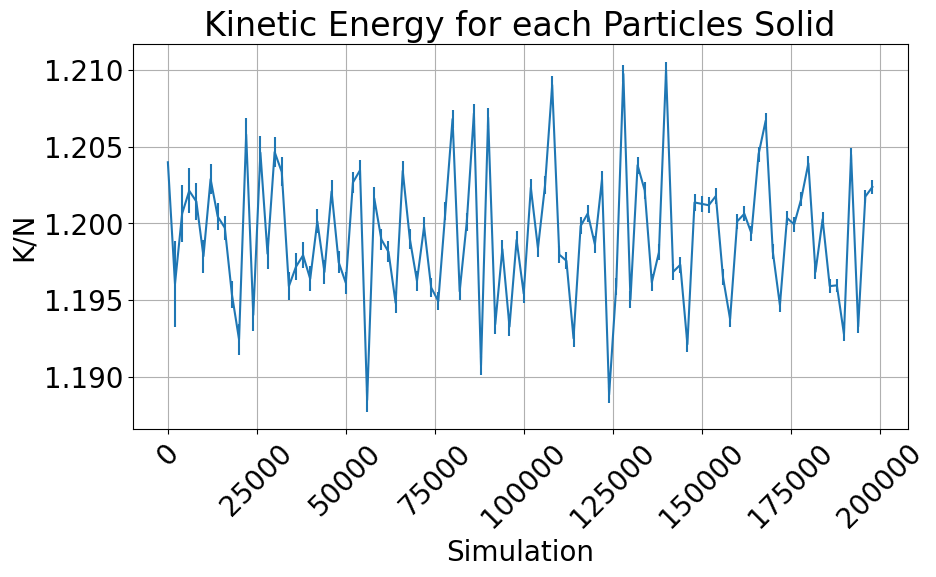

In [165]:
dataKSolid = pd.read_csv('../Esercizio4/output_ekinS.dat', sep='\s+', header=None, names=['values', 'g', 'error'])
plt.title('Kinetic Energy for each Particles Solid')
plt.errorbar(x1,dataKSolid["values"],yerr=dataKSolid["error"])
plt.rcParams["figure.figsize"]=(10,5)
plt.xlabel('Simulation')
plt.ylabel('K/N')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

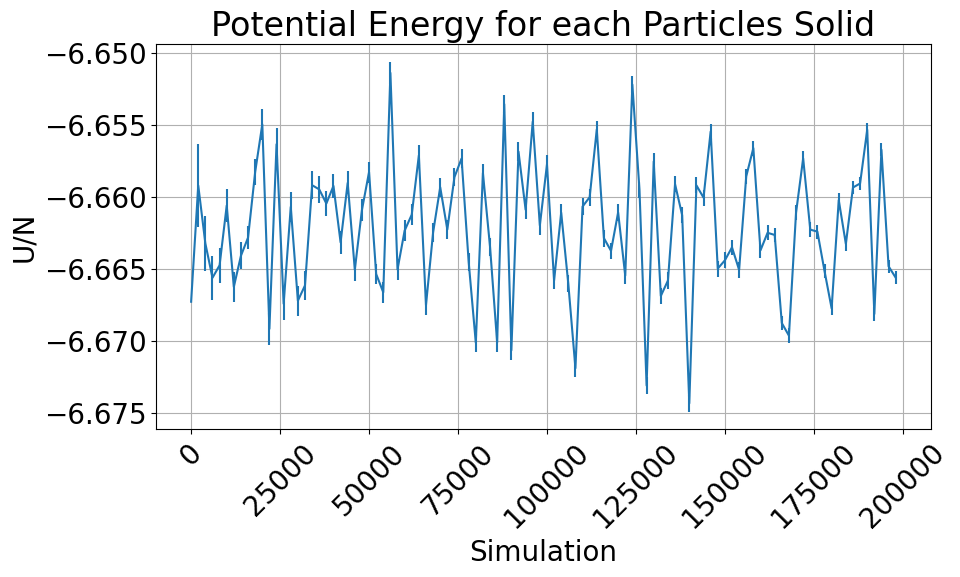

In [166]:
dataPotSolid = pd.read_csv('../Esercizio4/output_epotS.dat', sep='\s+', header=None, names=['values', 'g', 'error'])
plt.title('Potential Energy for each Particles Solid')
plt.errorbar(x1,dataPotSolid["values"],yerr=dataPotSolid["error"])
plt.rcParams["figure.figsize"]=(10,5)
plt.xlabel('Simulation')
plt.ylabel('U/N')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

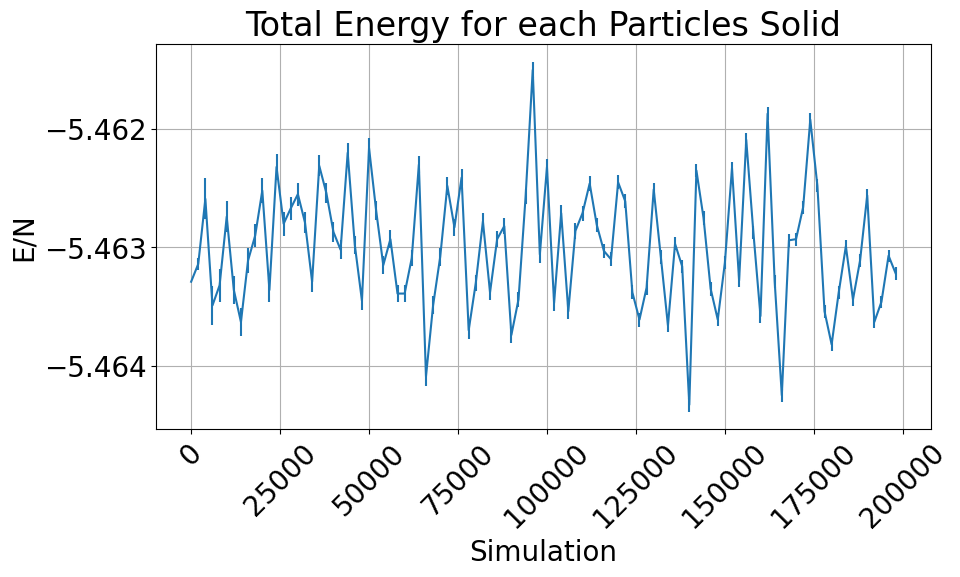

In [167]:
dataETotSolid = pd.read_csv('../Esercizio4/output_etotS.dat', sep='\s+', header=None, names=['values', 'g', 'error'])
plt.title('Total Energy for each Particles Solid')
plt.errorbar(x1,dataETotSolid["values"],yerr=dataETotSolid["error"])
plt.rcParams["figure.figsize"]=(10,5)
plt.xlabel('Simulation')
plt.ylabel('E/N')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

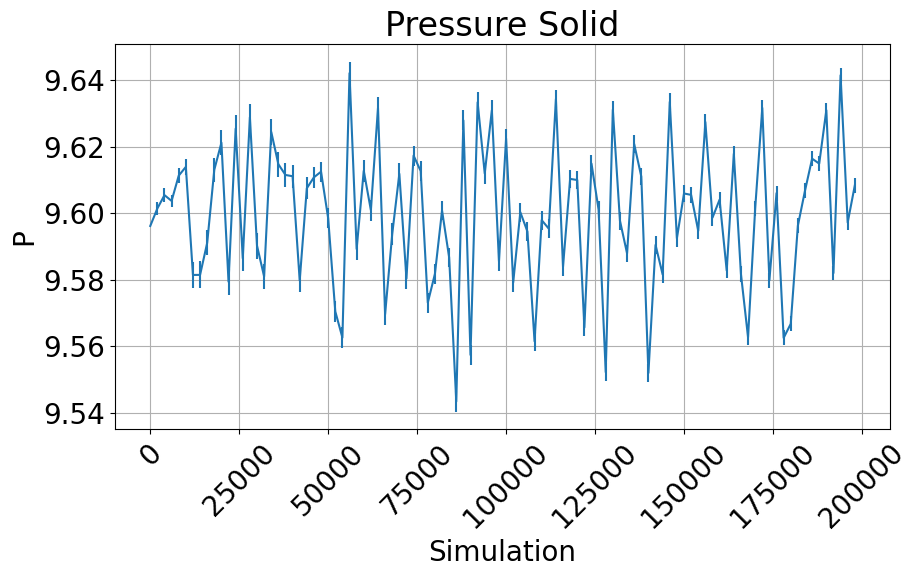

In [168]:
dataPressSolid = pd.read_csv('../Esercizio4/output_ptotS.dat', sep='\s+', header=None, names=['values', 'g', 'error'])
plt.title('Pressure Solid')
plt.errorbar(x1,dataPressSolid["values"],yerr=dataPressSolid["error"])
plt.rcParams["figure.figsize"]=(10,5)
plt.xlabel('Simulation')
plt.ylabel('P')
plt.grid(True)
plt.xticks(rotation = 45)
plt.show()


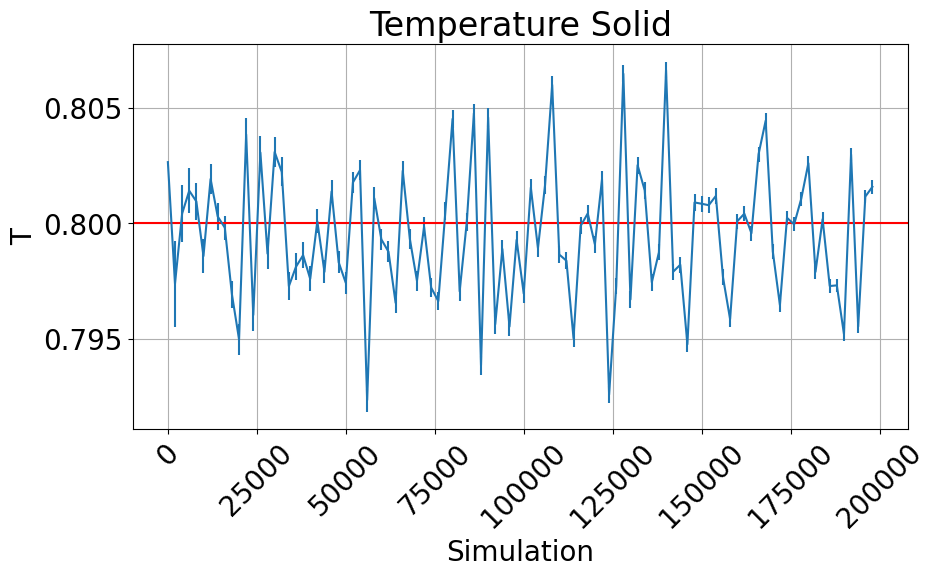

In [169]:
dataTempSolid = pd.read_csv('../Esercizio4/output_tempS.dat', sep='\s+', header=None, names=['values', 'g', 'error'])
plt.title('Temperature Solid')
plt.errorbar(x1,dataTempSolid["values"],yerr=dataTempSolid["error"])
plt.rcParams["figure.figsize"]=(10,5)
plt.axhline(y=0.8, color='r', linestyle='-')
plt.xlabel('Simulation')
plt.ylabel('T')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

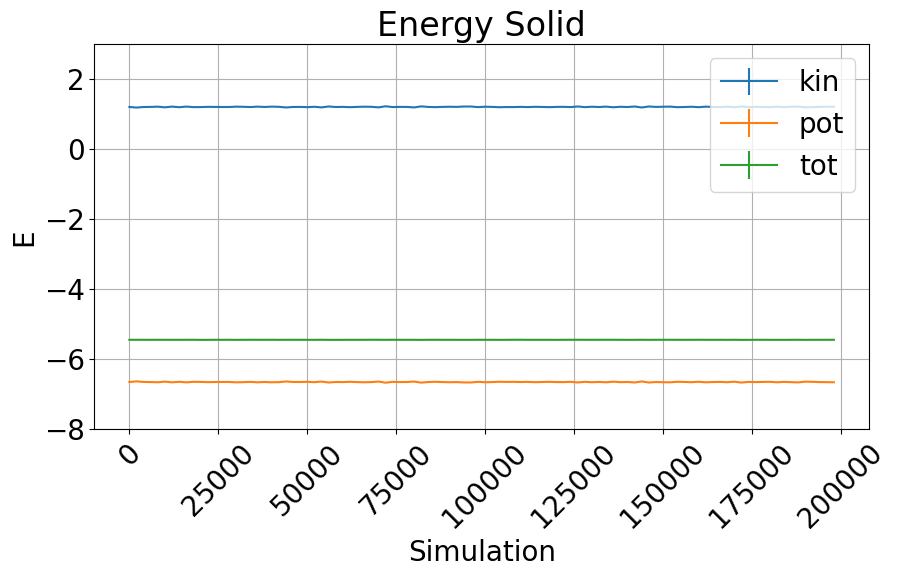

In [143]:
plt.errorbar(x1,dataKSolid["values"],yerr=dataKSolid["error"], label="kin")
plt.errorbar(x1,dataPotSolid["values"],yerr=dataPotSolid["error"], label="pot")
plt.errorbar(x1,dataETotSolid["values"],yerr=dataETotSolid["error"], label="tot")
plt.title('Energy Solid')
plt.legend(loc="upper right")
plt.ylim(-8, 3)
plt.rcParams["figure.figsize"]=(10,5)
plt.xlabel('Simulation')
plt.ylabel('E')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

### Liquid Phase:

### Starting with T=2.0

### Values in input.in for liquid:
0=MD
0=restart
2.0=temp
108=npart
0.8=rho
2.5=rcut
0.0005=delta
100=nblk
2000=nstep

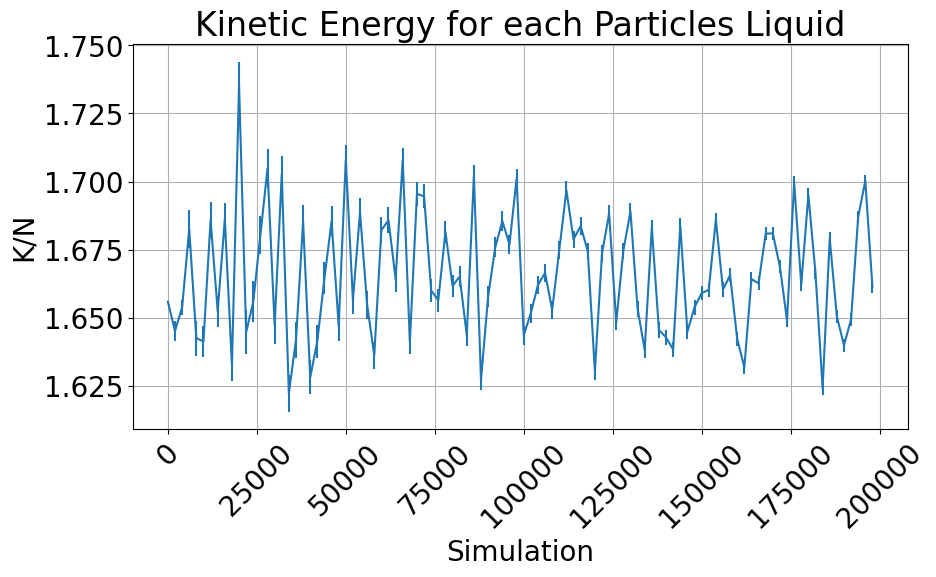

In [170]:
plt.rcParams.update({'font.size': 20})
dataKLiquid = pd.read_csv('../Esercizio4/output_ekinL.dat', sep='\s+', header=None, names=['values', 'g', 'error'])
plt.title('Kinetic Energy for each Particles Liquid')
plt.errorbar(x1,dataKLiquid["values"],yerr=dataKLiquid["error"])
plt.rcParams["figure.figsize"]=(10,5)
plt.xlabel('Simulation')
plt.ylabel('K/N')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

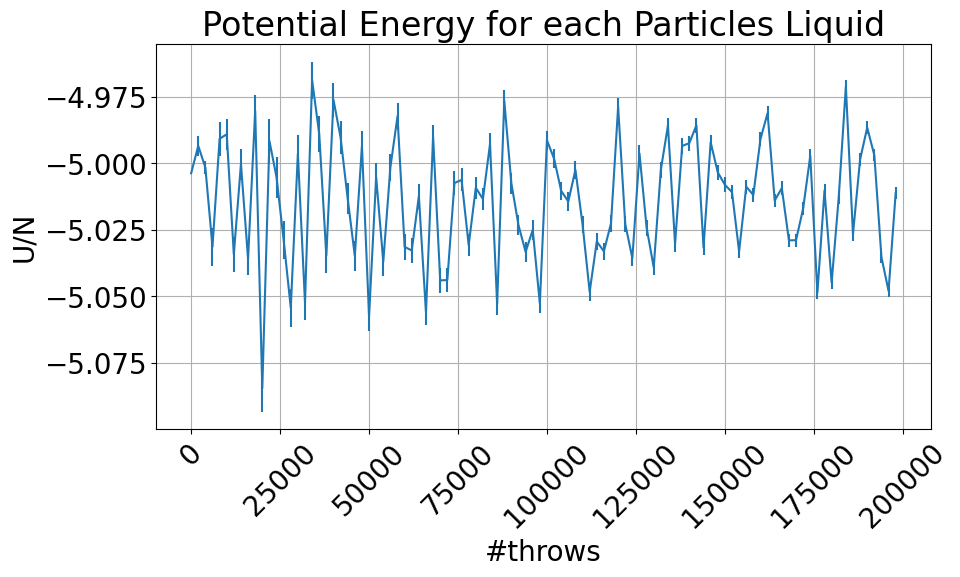

In [171]:
dataPotLiquid = pd.read_csv('../Esercizio4/output_epotL.dat', sep='\s+', header=None, names=['values', 'g', 'error'])
plt.title('Potential Energy for each Particles Liquid')
plt.errorbar(x1,dataPotLiquid["values"],yerr=dataPotLiquid["error"])
plt.rcParams["figure.figsize"]=(10,5)
plt.xlabel('#throws')
plt.ylabel('U/N')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

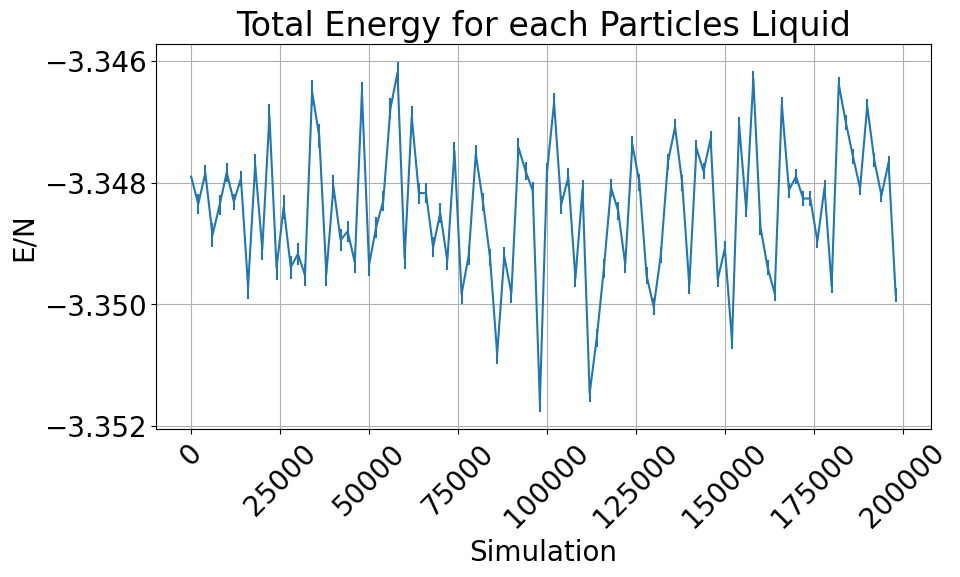

In [172]:
dataETotLiquid = pd.read_csv('../Esercizio4/output_etotL.dat', sep='\s+', header=None, names=['values', 'g', 'error'])
plt.title('Total Energy for each Particles Liquid')
plt.errorbar(x1,dataETotLiquid["values"],yerr=dataETotLiquid["error"])
plt.rcParams["figure.figsize"]=(10,5)
plt.xlabel('Simulation')
plt.ylabel('E/N')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

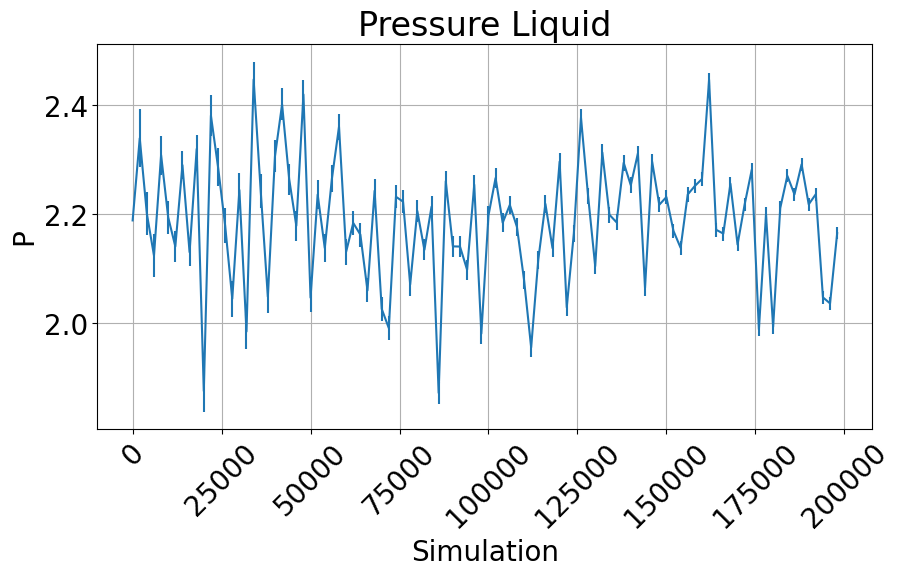

In [173]:
dataPressLiquid = pd.read_csv('../Esercizio4/output_ptotL.dat', sep='\s+', header=None, names=['values', 'g', 'error'])
plt.title('Pressure Liquid')
plt.errorbar(x1,dataPressLiquid["values"],yerr=dataPressLiquid["error"])
plt.rcParams["figure.figsize"]=(10,5)
plt.xlabel('Simulation')
plt.xticks(rotation = 45)
plt.ylabel('P')
plt.grid(True)
plt.show()

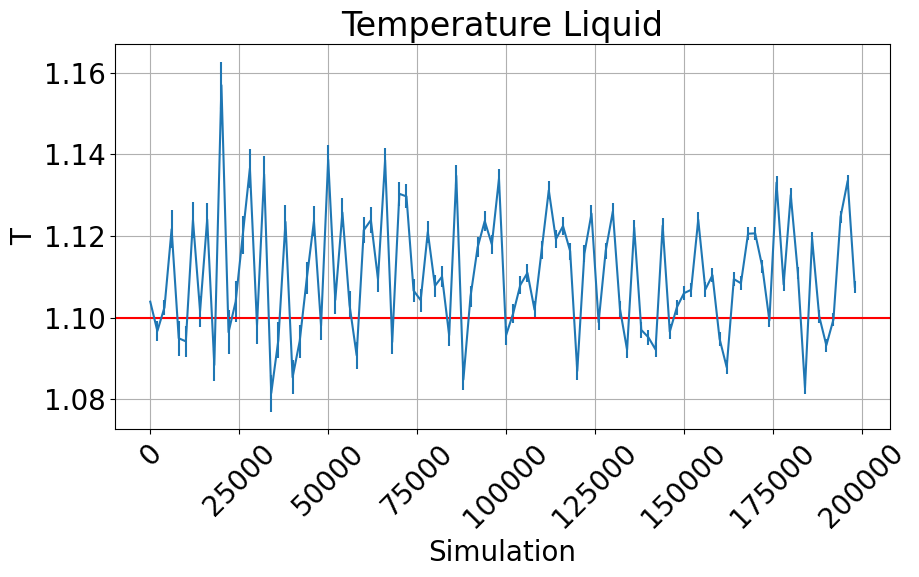

In [174]:
dataTempLiquid = pd.read_csv('../Esercizio4/output_tempL.dat', sep='\s+', header=None, names=['values', 'g', 'error'])
plt.title('Temperature Liquid')
plt.errorbar(x1,dataTempLiquid["values"],yerr=dataTempLiquid["error"])
plt.axhline(y=1.1, color='r', linestyle='-')
plt.rcParams["figure.figsize"]=(10,5)
plt.xlabel('Simulation')
plt.ylabel('T')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

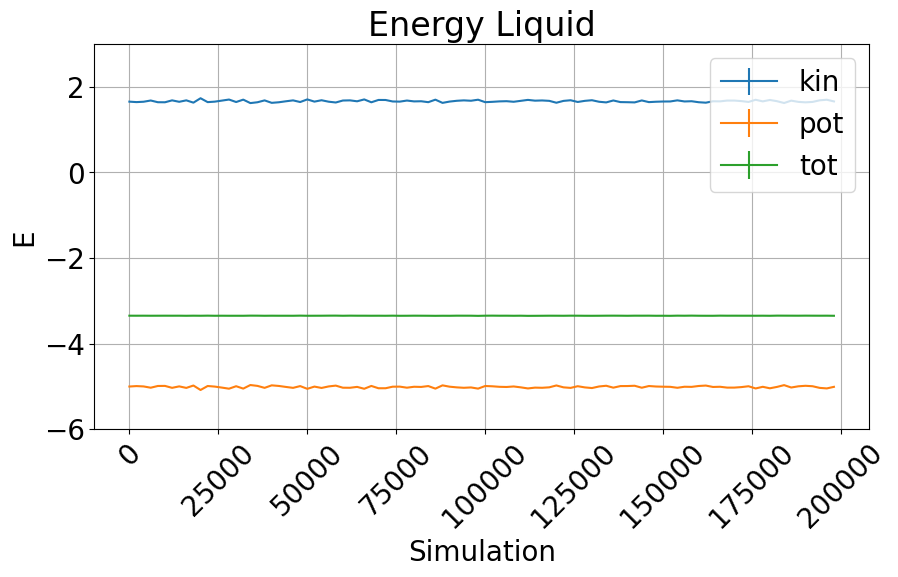

In [175]:
plt.errorbar(x1,dataKLiquid["values"],yerr=dataKLiquid["error"], label="kin")
plt.errorbar(x1,dataPotLiquid["values"],yerr=dataPotLiquid["error"], label="pot")
plt.errorbar(x1,dataETotLiquid["values"],yerr=dataETotLiquid["error"], label="tot")
plt.title('Energy Liquid')
plt.legend(loc="upper right")
plt.ylim(-6, 3)
plt.rcParams["figure.figsize"]=(10,5)
plt.xlabel('Simulation')
plt.ylabel('E')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

### Gas Phase:

### Starting with T=0.94

### Values in input.in for liquid:
0=MD
0=restart
0.94=temp 
108=npart
0.05=rho
5.0=rcut
0.0005=delta
100=nblk
2000=nstep

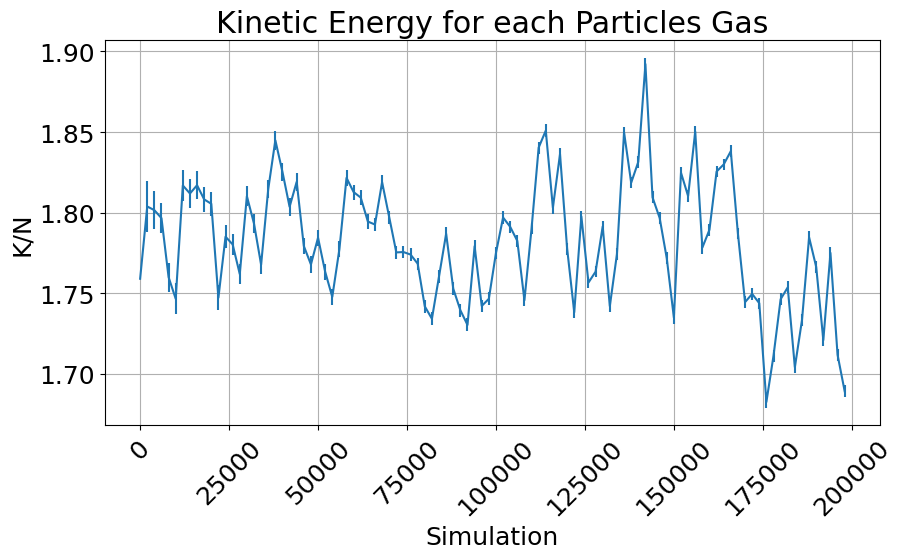

In [176]:
plt.rcParams.update({'font.size': 18})
dataKGas = pd.read_csv('../Esercizio4/output_ekinG.dat', sep='\s+', header=None, names=['values', 'g', 'error'])
plt.title('Kinetic Energy for each Particles Gas')
plt.errorbar(x1,dataKGas["values"],yerr=dataKGas["error"])
plt.rcParams["figure.figsize"]=(10,5)
plt.xlabel('Simulation')
plt.ylabel('K/N')
plt.grid(True)
plt.xticks(rotation = 45)
plt.show()

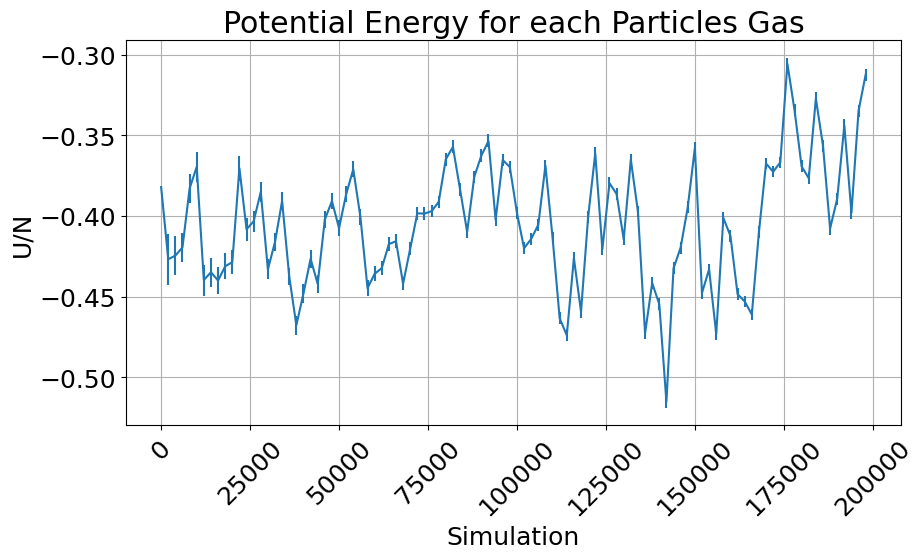

In [177]:
dataPotGas = pd.read_csv('../Esercizio4/output_epotG.dat', sep='\s+', header=None, names=['values', 'g', 'error'])
plt.title('Potential Energy for each Particles Gas')
plt.errorbar(x1,dataPotGas["values"],yerr=dataPotGas["error"])
plt.rcParams["figure.figsize"]=(10,5)
plt.xlabel('Simulation')
plt.ylabel('U/N')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

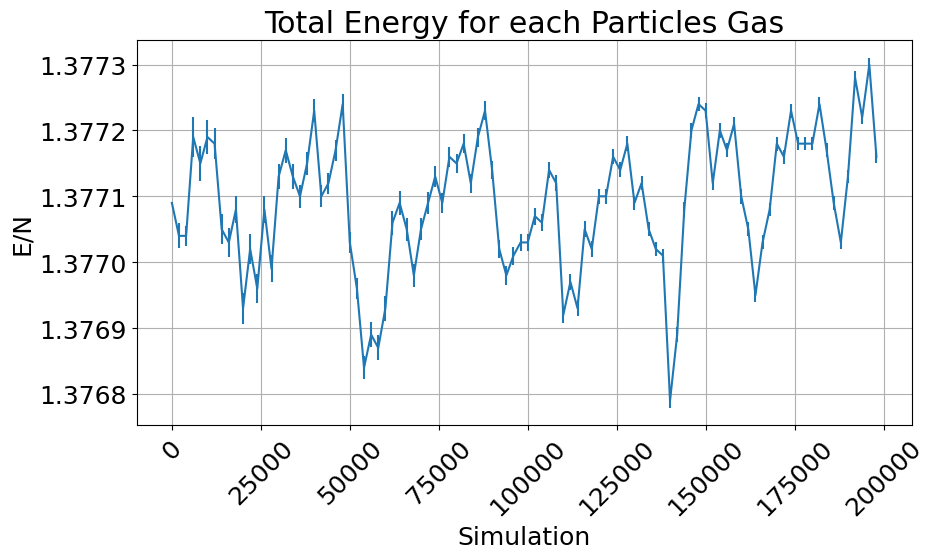

In [178]:
dataETotGas = pd.read_csv('../Esercizio4/output_etotG.dat', sep='\s+', header=None, names=['values', 'g', 'error'])
plt.errorbar(x1,dataETotGas["values"],yerr=dataETotGas["error"])
plt.title('Total Energy for each Particles Gas')
plt.rcParams["figure.figsize"]=(10,5)
plt.xlabel('Simulation')
plt.ylabel('E/N')
plt.grid(True)
plt.xticks(rotation = 45)
plt.show()

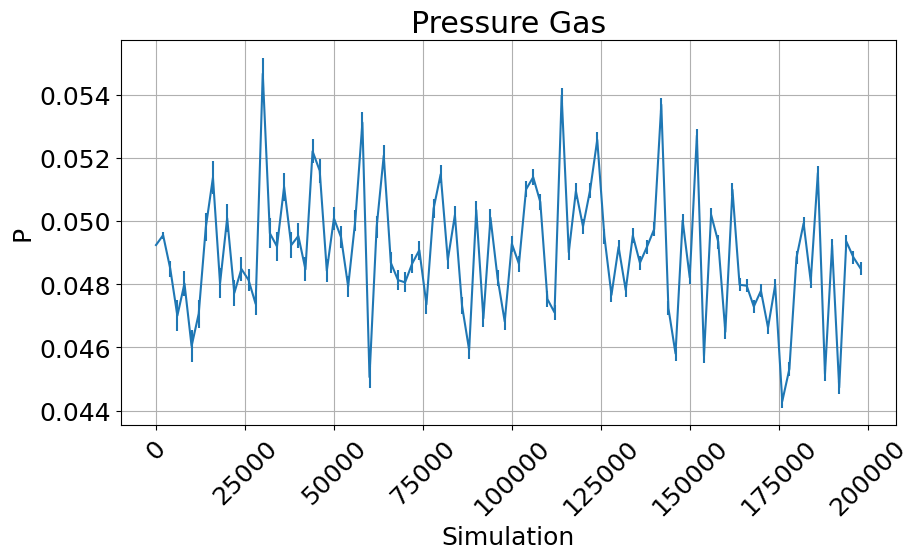

In [179]:
dataPressGas = pd.read_csv('../Esercizio4/output_ptotG.dat', sep='\s+', header=None, names=['values', 'g', 'error'])
plt.title('Pressure Gas')
plt.errorbar(x1,dataPressGas["values"],yerr=dataPressGas["error"])
plt.rcParams["figure.figsize"]=(10,5)
plt.xlabel('Simulation')
plt.ylabel('P')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

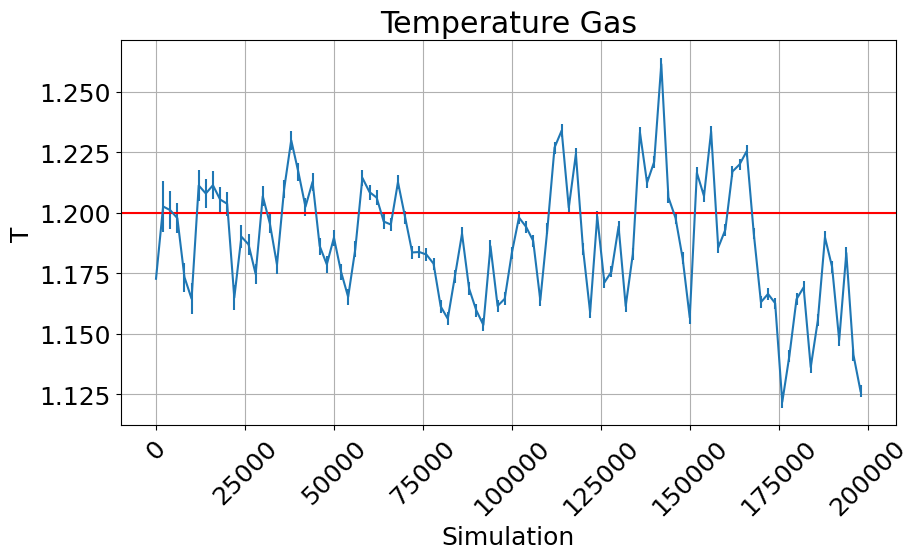

In [180]:
dataTempGas = pd.read_csv('../Esercizio4/output_tempG.dat', sep='\s+', header=None, names=['values', 'g', 'error'])
plt.title('Temperature Gas')
plt.errorbar(x1,dataTempGas["values"],yerr=dataTempGas["error"])
plt.rcParams["figure.figsize"]=(10,5)
plt.axhline(y=1.2, color='r', linestyle='-')
plt.xlabel('Simulation')
plt.ylabel('T')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

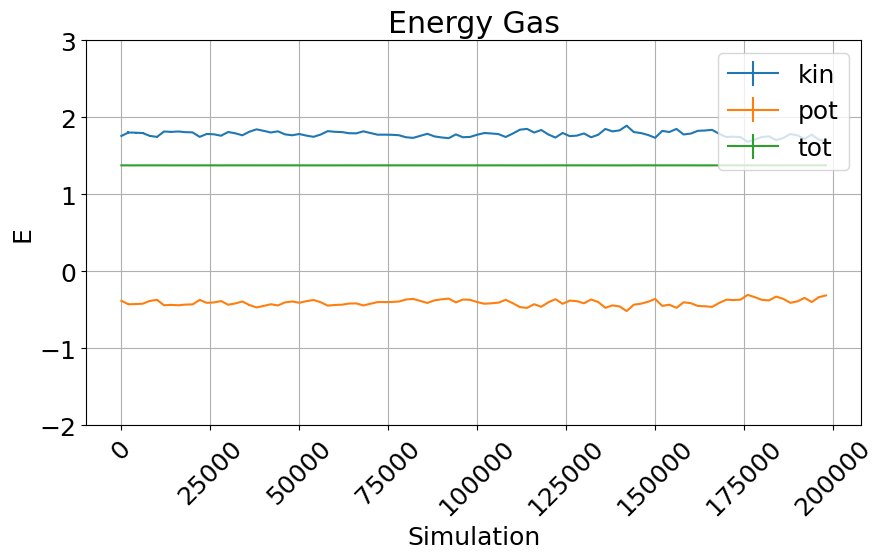

In [181]:
plt.errorbar(x1,dataKGas["values"],yerr=dataKGas["error"], label="kin")
plt.errorbar(x1,dataPotGas["values"],yerr=dataPotGas["error"], label="pot")
plt.errorbar(x1,dataETotGas["values"],yerr=dataETotGas["error"], label="tot")
plt.legend(loc="upper right")
plt.title('Energy Gas')
plt.ylim(-2, 3)
plt.rcParams["figure.figsize"]=(10,5)
plt.xlabel('Simulation')
plt.ylabel('E')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

### The T will not conserve the values because its a Dynamic Simulation, the velocities change, then the kinect energy change, so does the temperature.

### Exercise 04.1

The Molecular Dynamics / Monte Carlo (MD_MC) code we have provided compute the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, and the temperature, $T$.

<span style="color:red">Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: block averages, progressive average values and progresssive uncertainties.</span>



Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

### Exercise 04.2



By means of your upgraded code, <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained progressive average values and uncertainties as a functions of the increasing number of blocks for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$, in reduced units!

### <span style="color:green"> Equilibration is needed!</span>

By monitoring the temperature, $T$, during the first time steps of the simulation, you will observe that at the beginning, starting from a perfect crystalline configuration, $T$ will not conserve its value. Can you understand and explain this behaviour?

Explore and find the starting value of $T$ needed to stabilize, after a certain number of time steps (equilibration time), the average value of $T$ on the desired $T^\star$. <span style="color:red">Perform your solid/liquid phase MD simulations by re-starting them after such equilibration time.</span>